## Feature & Spatial Feature Plot Using Seurat

In [7]:
library(GenomeInfoDbData)

In [8]:
library(Seurat)

Attaching SeuratObject

Attaching sp


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays




In [3]:
library(SeuratData)

ERROR: Error in library(SeuratData): there is no package called ‘SeuratData’


In [4]:
# if (FALSE) {
# # For output from CellRanger < 3.0
# data_dir <- '/home/kv64/Desktop/science_papers/spatial_ml_tumor/F8_38_c'
# list.files(data_dir) # Should show barcodes.tsv, genes.tsv, and matrix.mtx
# expression_matrix <- Read10X(data.dir = data_dir)
# seurat_object = CreateSeuratObject(counts = expression_matrix)

# # For output from CellRanger >= 3.0 with multiple data types
# data_dir <- '/home/kv64/Desktop/science_papers/spatial_ml_tumor/F8_38_c'
# list.files(data_dir) # Should show barcodes.tsv.gz, features.tsv.gz, and matrix.mtx.gz
# data <- Read10X(data.dir = data_dir)
# seurat_object = CreateSeuratObject(counts = data$`Gene Expression`)
# seurat_object[['Protein']] = CreateAssayObject(counts = data$`Antibody Capture`)
# }

### 1. Read data to a Seurat object 

In [5]:
library(dplyr)
library(Seurat)
library(patchwork)

# Load the PBMC dataset
pbmc.data <- Read10X(data.dir = "../new_outs/mouse_outs/F8_37_outs/filtered_feature_bc_matrix")
# Initialize the Seurat object with the raw (non-normalized data).
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)
pbmc


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




An object of class Seurat 
17016 features across 3520 samples within 1 assay 
Active assay: RNA (17016 features, 0 variable features)

In [6]:
#rownames(x = pbmc)

### Standard pre-processing workflow

In [7]:
# pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

In [8]:
# # Visualize QC metrics as a violin plot
# VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [9]:
# plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
# plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
# plot1 + plot2

### 2. Normalizing the data

In [10]:
#Old Log Normalization Pipeline:
#pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)

#New sctransform Pipeline:
library(sctransform)
pbmc <- SCTransform(object = pbmc)


Attaching package: ‘sctransform’


The following object is masked _by_ ‘.GlobalEnv’:

    pbmc


Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 16163 by 3520

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3520 cells



  |======================================================================| 100%


Found 42 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 16163 genes



  |======================================================================| 100%


Computing corrected count matrix for 16163 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 58.82109 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



In [11]:
#pbmc <- NormalizeData(pbmc)

## 3. PCA Feature Plot:

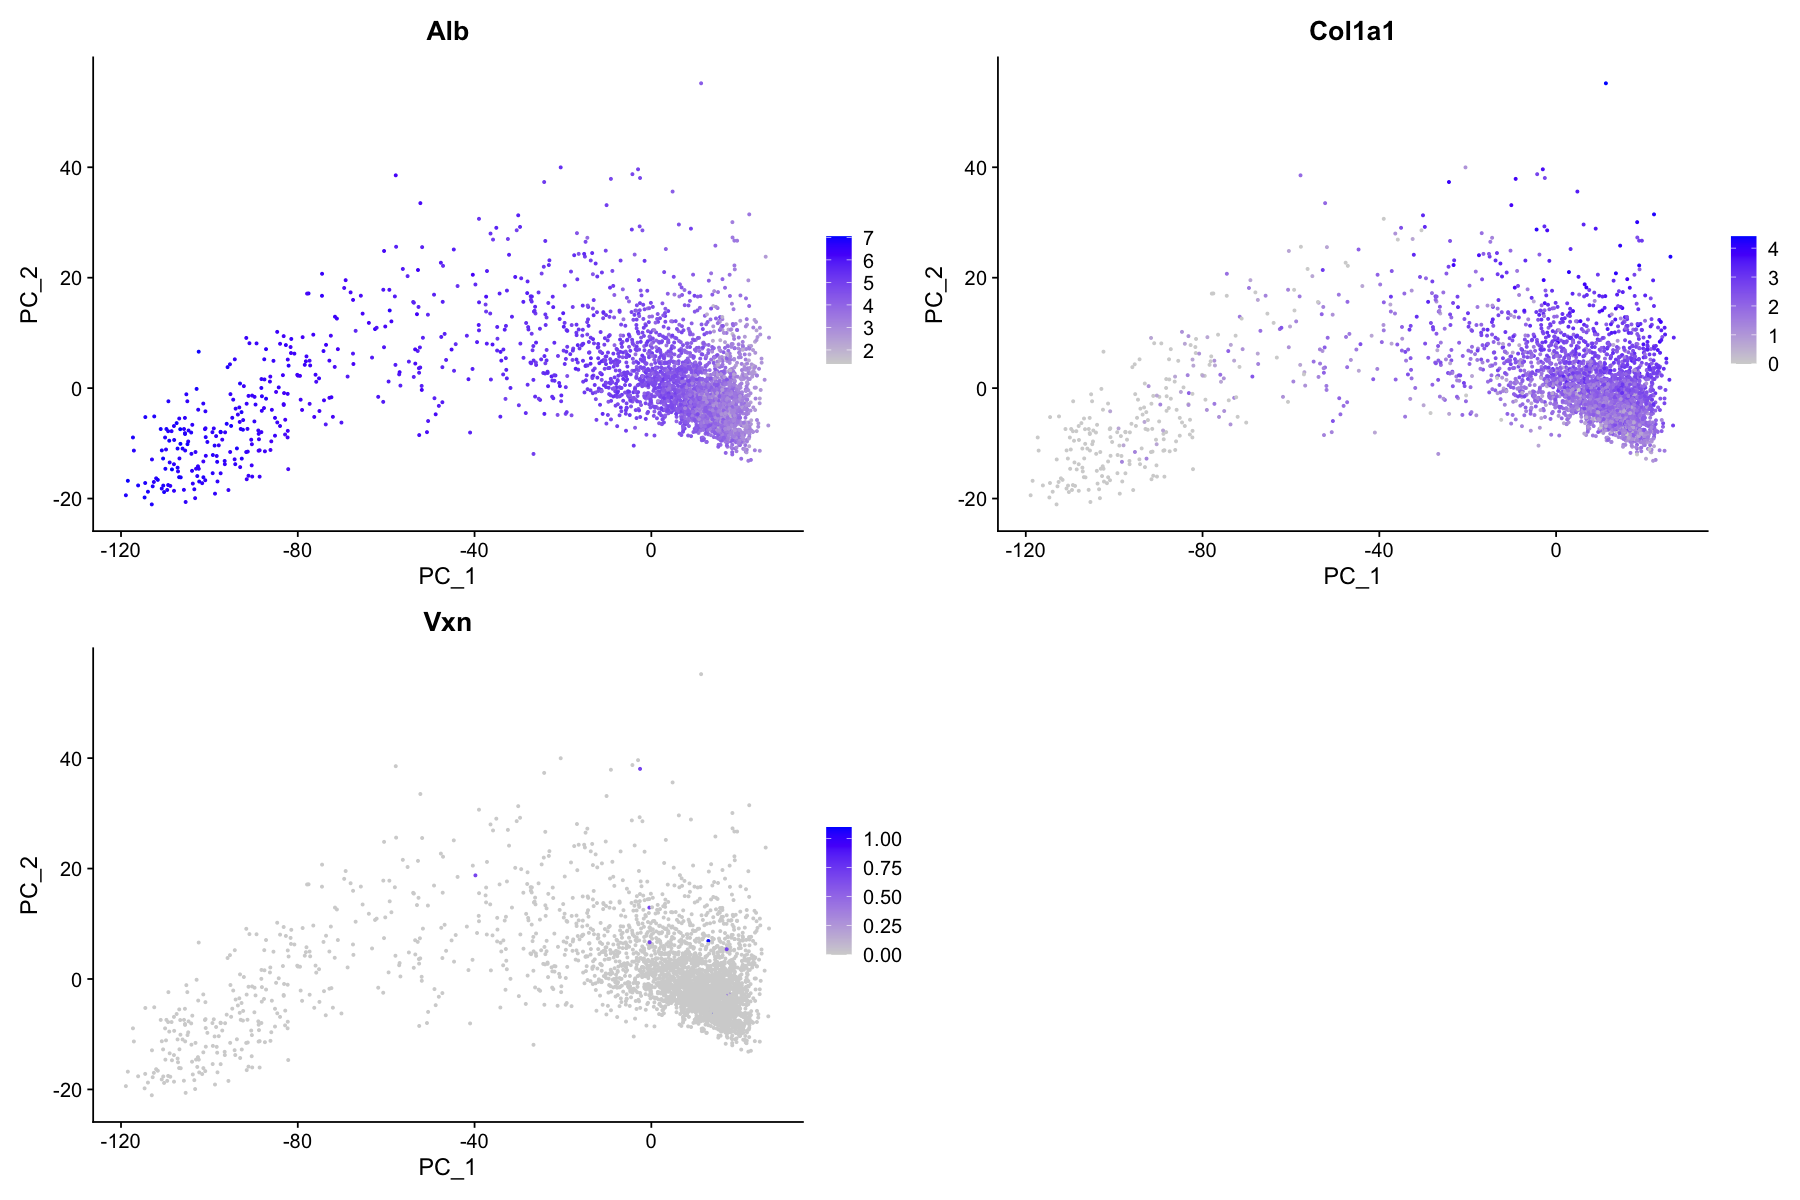

In [22]:
pbmc_pca <- RunPCA(pbmc, assay = "SCT", verbose = FALSE)
FeaturePlot(object = pbmc_pca, features = c("Alb", "Col1a1","Vxn"), reduction="pca")

In [2]:
#colnames(x = pbmc)
#Cells(x = pbmc)
#rownames(x = pbmc)
#ncol(x = pbmc)
#nrow(x = pbmc)

In [3]:
plot1 <- VlnPlot(pbmc, features = c("Alb", "Col1a1"), pt.size = 0.1) + NoLegend()
plot1

ERROR: Error in VlnPlot(pbmc, features = c("Alb", "Col1a1"), pt.size = 0.1): could not find function "VlnPlot"


## 4. Spatial Feature Plot:

In [16]:
#Import the SpatialExperiment library and hdf5r libraries
library(SpatialExperiment)
library(hdf5r)

In [17]:
#Reading in image data
img <- Read10X_Image("../new_outs/mouse_outs/F8_37_outs/spatial",
  image.name = "tissue_lowres_image.png",
  filter.matrix = TRUE)

In [18]:
#Creating Seurat Object

visObj <-Load10X_Spatial(
  "../new_outs/mouse_outs/F8_37_outs",
  filename = "filtered_feature_bc_matrix.h5",
  assay = "Spatial",
  slice = "slice1",
  filter.matrix = TRUE,
  to.upper = FALSE,
  image = img)

In [19]:
#Converts the gene expression counts to integers
visObj@images[["slice1"]]@coordinates[["tissue"]] <- as.integer(visObj@images[["slice1"]]@coordinates[["tissue"]])
visObj@images[["slice1"]]@coordinates[["row"]] <- as.integer(visObj@images[["slice1"]]@coordinates[["row"]])
visObj@images[["slice1"]]@coordinates[["col"]] <- as.integer(visObj@images[["slice1"]]@coordinates[["col"]])
visObj@images[["slice1"]]@coordinates[["imagerow"]] <- as.integer(visObj@images[["slice1"]]@coordinates[["imagerow"]])
visObj@images[["slice1"]]@coordinates[["imagecol"]] <- as.integer(visObj@images[["slice1"]]@coordinates[["imagecol"]])

In [21]:
#Perform SCTransform on the object (either before or after merging Seurat objects)
visObj = SCTransform(visObj, assay = "Spatial", verbose = FALSE)

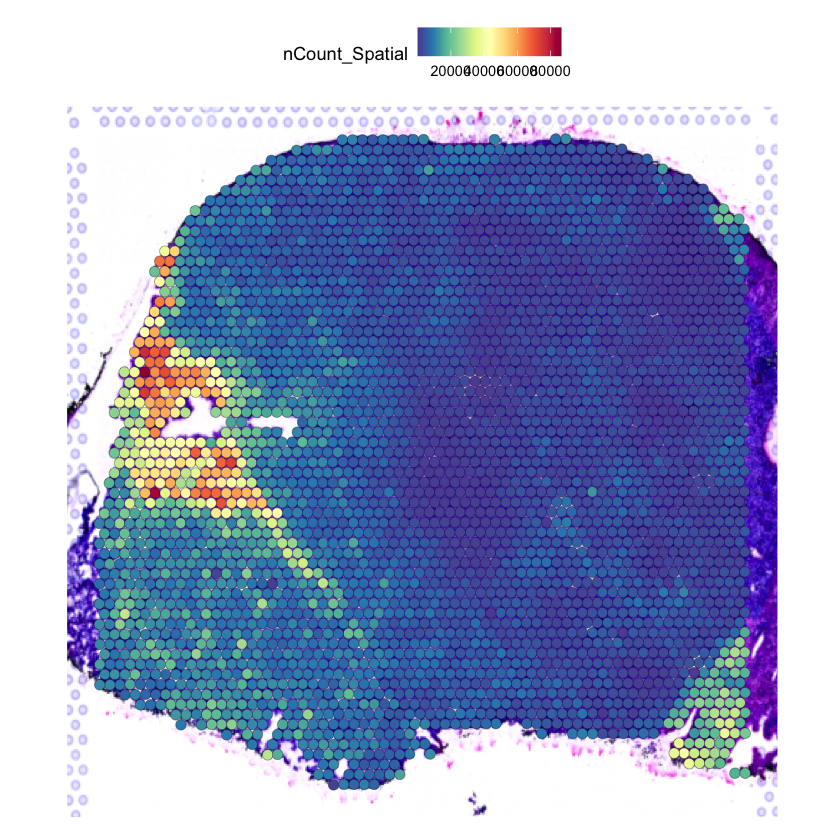

In [22]:
#This plots the total nCount_Spatial and saves it to the plot1 variable. NOTE: Outputing images in R might be slightly different.
plot1 <- SpatialFeaturePlot(visObj, features = "nCount_Spatial")
plot1

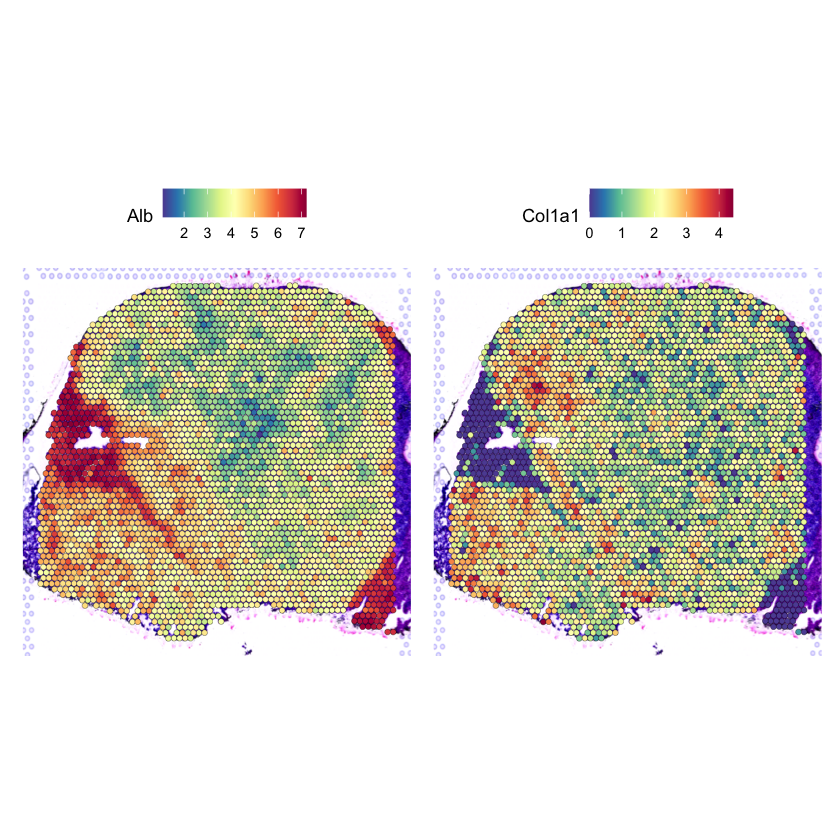

In [23]:
#This is how you would plot a set of gene expression maps.
SpatialFeaturePlot(object = visObj, features = c("Alb", "Col1a1") )

In [24]:
#And that's it. You can also perform any other analysis: PCA, UMAP, etc. that is available to Seurat objects normally on the visObj.